In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [11]:
df.columns = ['Name', 'Age', 'Income']
df.drop("Name",axis=1,inplace=True)

In [12]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


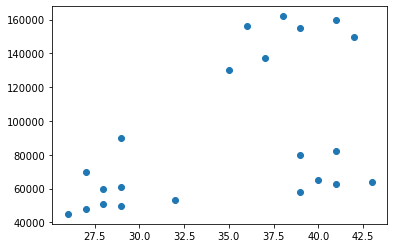

In [7]:
plt.scatter(df.Age,df.Income)

In [8]:
from sklearn.cluster import KMeans

In [13]:
k = KMeans(n_clusters=4)
y_pred = k.fit_predict(df)
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [14]:
df['cluster'] = y_pred
df.head()

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [15]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]

In [16]:
df2

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
19,39,80000,2
20,41,82000,2


In [17]:
df3

,Age,Income,cluster
9,35,130000,3
10,37,137000,3


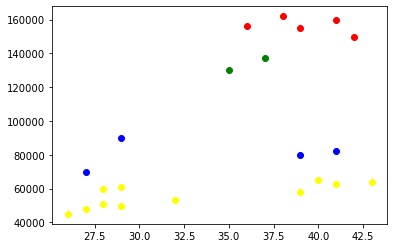

In [21]:
plt.scatter(df0.Age,df0.Income,color="yellow")
plt.scatter(df1.Age,df1.Income,color="red")
plt.scatter(df2.Age,df2.Income,color="blue")
plt.scatter(df3.Age,df3.Income,color="green")


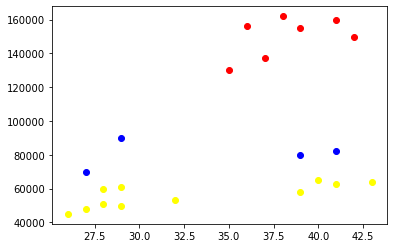

In [22]:
k = KMeans(n_clusters=3)
y_pred = k.fit_predict(df)
df['cluster'] = y_pred

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#df3 = df[df.cluster==3]

plt.scatter(df0.Age,df0.Income,color="yellow")
plt.scatter(df1.Age,df1.Income,color="red")
plt.scatter(df2.Age,df2.Income,color="blue")
#plt.scatter(df3.Age,df3.Income,color="green")

In [23]:
from sklearn.preprocessing import MinMaxScaler

(array([5., 6., 2., 2., 0., 0., 0., 2., 1., 4.]),
 array([ 45000.,  56700.,  68400.,  80100.,  91800., 103500., 115200.,
        126900., 138600., 150300., 162000.]),
 <BarContainer object of 10 artists>)

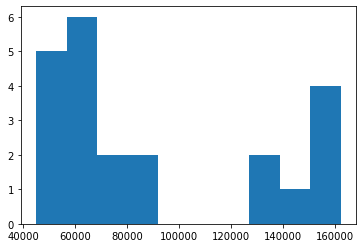

In [24]:
plt.hist(df.Income)

In [27]:
df.head()
df.drop("cluster",axis=1,inplace=True)

In [29]:
minmax = MinMaxScaler()
df[['Age','Income']] = minmax.fit_transform(df)
df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


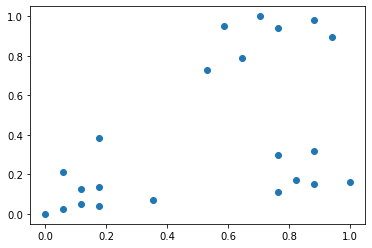

In [30]:
plt.scatter(df.Age,df.Income)

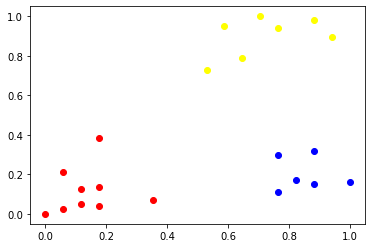

In [31]:
k = KMeans(n_clusters=3)
y_pred = k.fit_predict(df)
df['cluster'] = y_pred

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#df3 = df[df.cluster==3]

plt.scatter(df0.Age,df0.Income,color="yellow")
plt.scatter(df1.Age,df1.Income,color="red")
plt.scatter(df2.Age,df2.Income,color="blue")
#plt.scatter(df3.Age,df3.Income,color="green")

#distance 
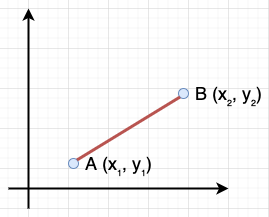

In [32]:
k.inertia_

0.4750783498553096

In [38]:
ssd=[]
for i in range(1,11):
    k = KMeans(n_clusters=i)
    k.fit(df)
    ssd.append(k.inertia_)

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
ssd

[18.38855696653363,
 5.945614491472593,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.2106667848801052,
 0.17381641006430287,
 0.1397684499538816,
 0.10383752586603562,
 0.08911561350120487]

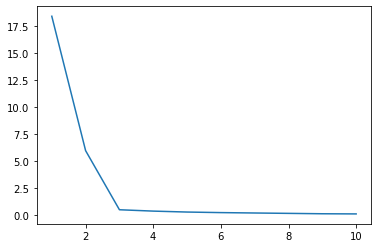

In [41]:
plt.plot(range(1,11),ssd)